### Reading:
1. Skim [this page](https://scikit-learn.org/stable/modules/clustering.html) to get an intuition for how clustering works. 
2. Study The first figure in Section 2.3.1 closely. Notice how different algorithms fit different datsets.

### Clustering with California Housing Dataset
- NOTE: Due to some randomness your results may differ slightly. Especially the color of the graphs. 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import fetch_california_housing

In [3]:
housing_dataset = fetch_california_housing() # get dataset

print(help(fetch_california_housing)) #NOTE: Housing prices are in units of 100,000. 

Help on function fetch_california_housing in module sklearn.datasets._california_housing:

fetch_california_housing(*, data_home=None, download_if_missing=True, return_X_y=False, as_frame=False)
    Load the California housing dataset (regression).
    
    ==============   ==============
    Samples total             20640
    Dimensionality                8
    Features                   real
    Target           real 0.15 - 5.
    ==============   ==============
    
    Read more in the :ref:`User Guide <california_housing_dataset>`.
    
    Parameters
    ----------
    data_home : optional, default: None
        Specify another download and cache folder for the datasets. By default
        all scikit-learn data is stored in '~/scikit_learn_data' subfolders.
    
    download_if_missing : optional, default=True
        If False, raise a IOError if the data is not locally available
        instead of trying to download the data from the source site.
    
    
    return_X_y : bool

In [4]:
#this is a look at the raw dataset

housing_dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
# create dataframe
housing_df = pd.DataFrame(housing_dataset.data, columns=housing_dataset.feature_names)

In [6]:
#preview dataframe
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
# set target variable
housing_df['MedHouseVal'] = housing_dataset.target

In [8]:
# look at our df
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Inspect the dataset. 
1. Inspect the data and take time to get familiar with this dataset.
2. Describe the data(use built-in functions to describe the data). 
    - Min/max, median etc...
3. Make a few plots to get familiar with the data. 

In [9]:
#Key Question: What does each column label mean?
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
#Key Question: What does each row mean?

#Each row is a house in California, USA


In [10]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
#Key Questions
   #Do multiple rows combine to a larger structure?
            #Ex. 8 rows are deliveries in one day. Each row is a single delivery.
        #Answer: no - each row is a single house - with 9 features about that house
   
    #Is the data scaled?
        #Yes - MedInc must be scaled, as must Population and MedHouseVal
        

In [11]:
#Key Questions

#Do I have NaNs, blanks etc..

#this function returns the row and column indices where the value is NaN.
np.where(pd.isnull(housing_df))

#the result is indicating that there are no NAN (or blank) values.

(array([], dtype=int64), array([], dtype=int64))

In [12]:
#Key Questions
    #How big is the data?  20640 rows (houses)
    
    #What type of data is in each column? Numerical/categorical. Continuous/discrete?
housing_df.info()
    #these are all numerical values (float) and they are discrete.
    
    #Does it make sense to me?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


<AxesSubplot:xlabel='HouseAge', ylabel='AveRooms'>

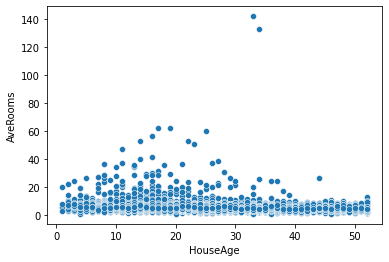

In [13]:
sns.scatterplot(data=housing_df, x="HouseAge", y="AveRooms")

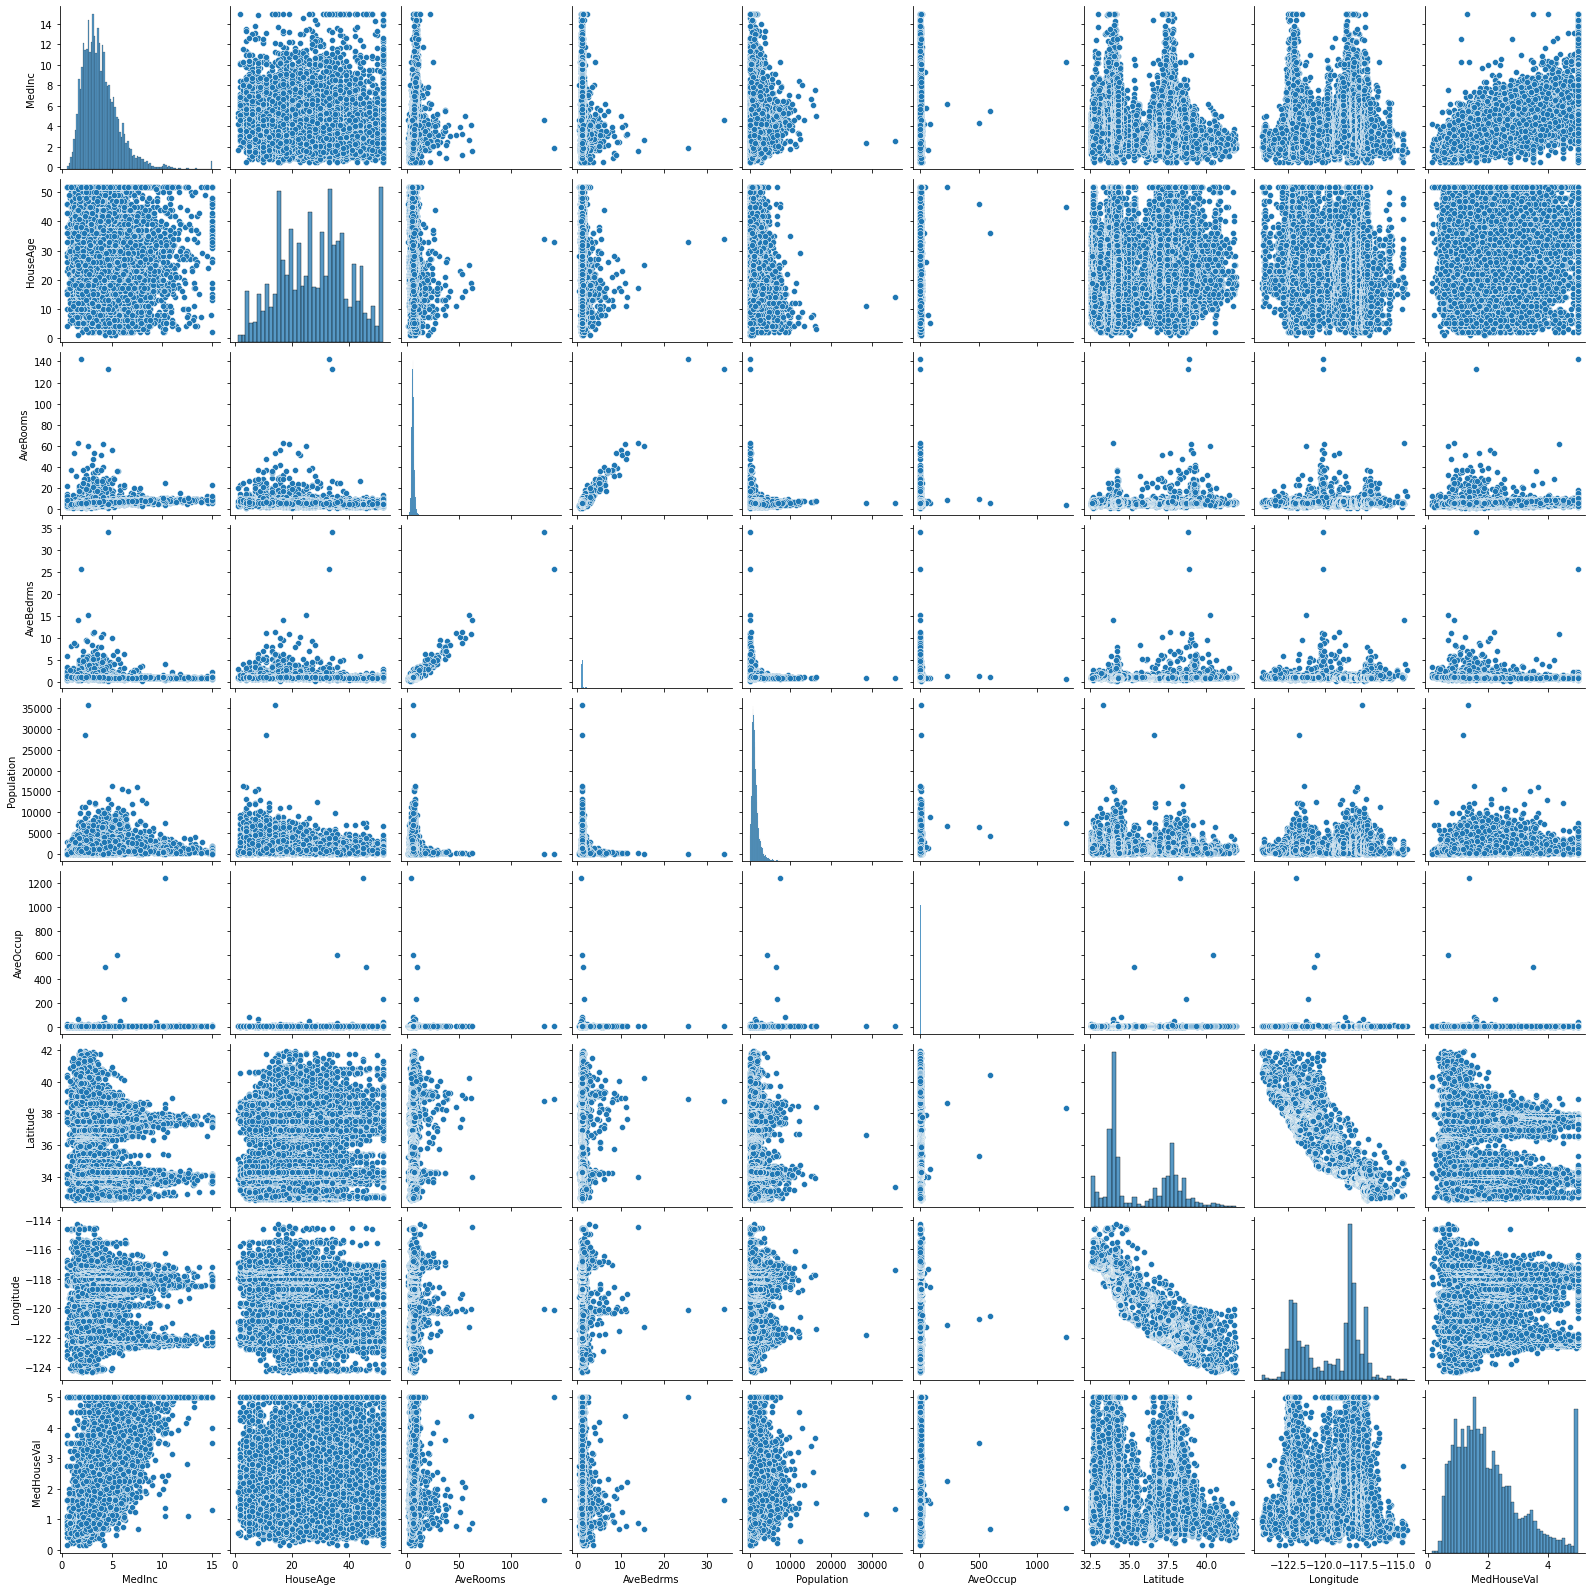

In [18]:
sns.pairplot(data = housing_df)

<AxesSubplot:>

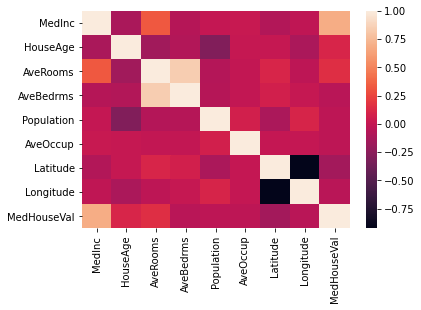

In [19]:
sns.heatmap(housing_df.corr(),)

### Make a scatter plot 
- Use the lats and lons to make a scatter plot. 
- The resulting graph should look roughly like California. 

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

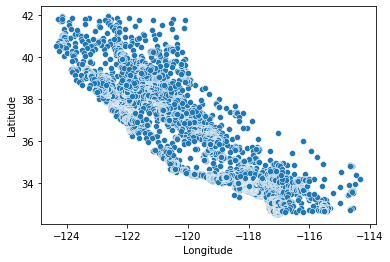

In [14]:
sns.scatterplot(data=housing_df, x="Longitude", y="Latitude")

### Cluster the data
1. Using only the lats and lons we will create clusters. 
2. Create a new `lat_lon_df` that has only lats and lons.
3. Using the `sklearn` library import the `KMeans` model. 
4. Create a `kmeans` variable with `KMeans` and set `n_clusters` = 2
5. Fit the `kmeans` model to the `lat_lon_df`
6. Call `.predict` on the model using `lat_lon_df` as our `X` value. **Note:** we are predicting on teh same thing we just clustered. 

In [15]:
#Create a new lat_lon_df that has only lats and lons.
lat_lon_df = housing_df[["Latitude", "Longitude"]]
lat_lon_df.head()

,Latitude,Longitude
0,37.88,-122.23
1,37.86,-122.22
2,37.85,-122.24
3,37.85,-122.25
4,37.85,-122.25


In [16]:
#Using the sklearn library import the KMeans model.
from sklearn.cluster import KMeans

In [45]:
#Create a kmeans variable with KMeans and set n_clusters = 2
kmeans = KMeans(n_clusters=2)

In [46]:
#Fit the kmeans model to the lat_lon_df
kmeans.fit(lat_lon_df)

KMeans(n_clusters=2)

In [47]:
#Call .predict on the model using lat_lon_df as our X value
kmeans.predict(lat_lon_df)

array([1, 1, 1, ..., 1, 1, 1])

### See the Centroids

Since the k value was set to 2, we will have two centroids which can be viewed using the `.cluster_centers_` attribute.

1. print the centroid values
2. print the labels using `kmeans.labels_`
3. createa  variable called `clust2` that holds `kmeans.labels_`.
3. Create a set on the labels to view all unique labels. 

In [48]:
#print the centroid values
kmeans.cluster_centers_

array([[  33.98758028, -118.04773591,    0.90440695],
       [  38.01248102, -121.77323767,    1.84297913]])

In [49]:
#print the labels using kmeans.labels_
#create a variable called clust2 that holds kmeans.labels_.
clust2 = list(kmeans.labels_)

In [50]:
#Create a set on the labels to view all unique labels.
set(kmeans.labels_)

{0, 1}

### Plot the clustered dataset
1. Add a column called `clust2` to the `lat_lon_df`.
2. Set the `reg2` column to `reg2` variable. 
3. You may get a warning but it's ok. 
4. Display the `lat_lon_df`. You should have 3 columns. Lat/Lon/reg2. 
5. Create a scatterplot of the 2 clustered regions. 
6. Optional: See if you can get the warning to go away. 
7. Optional: Change the value of `n_clusters` and rerun the notebook. Be sure to change it back to 2!

In [52]:
#Add a column called clust2 to the lat_lon_df
#Set the clust2 column to clust2 variable
lat_lon_df['clust2'] = clust2

c:\users\abiel\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
#Display the lat_lon_df. You should have 3 columns. Lat/Lon/clust2.
lat_lon_df.head()

,Latitude,Longitude,clust2
0,37.88,-122.23,1
1,37.86,-122.22,1
2,37.85,-122.24,1
3,37.85,-122.25,1
4,37.85,-122.25,1


NameError: name 'plt' is not defined

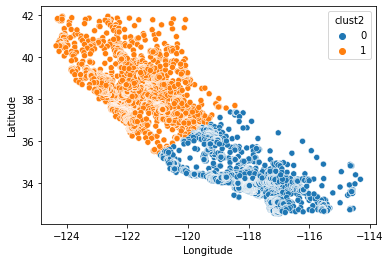

In [54]:
#Create a scatterplot of the 2 clustered regions

centroids = kmeans.cluster_centers_
centroids
sns.scatterplot(x='Longitude',y='Latitude',data=lat_lon_df,hue='clust2')
plt.scatter(x=centroids[:,1], y=centroids[:,0], color='r',marker='D')

### Split original df based on our clustering
1. Set column `reg2` in `housing_df` equal to `lat_lon_df['reg2']
2. Display the dataframe. 
3. Create a new df called `so_cal_df` that only has the blocks in southern California (reg2 with a value of 1). 
3. Create a new df called `no_cal_df` that only has the blocks in norther California (reg2 with a value of 0).
4. Plot the lats and lons of `so_cal_df` and `no_cal_df`.

In [55]:
#Set column clust2 in housing_df equal to `lat_lon_df['clust2']
#Display the dataframe
housing_df['clust2'] = lat_lon_df['clust2']
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,clust2
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1


In [56]:
#Create a new df called so_cal_df that only has the blocks in southern California (clust2 with a value of 1)
so_cal_df = housing_df[housing_df['clust2']==1]

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

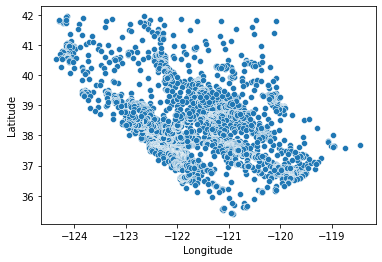

In [57]:
#Plot the lats and lons of so_cal_df and no_cal_df
sns.scatterplot(x=so_cal_df['Longitude'],y=so_cal_df['Latitude'],data=so_cal_df)

In [58]:
#Create a new df called no_cal_df that only has the blocks in norther California (clust2 with a value of 0)
no_cal_df = housing_df[housing_df['clust2']==0]

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

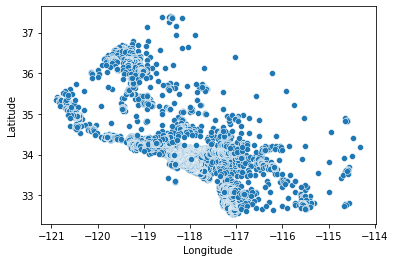

In [59]:
#Plot the lats and lons of so_cal_df and no_cal_df
sns.scatterplot(x=no_cal_df['Longitude'],y=no_cal_df['Latitude'],data=no_cal_df)

### Calculate the median house values
1. Calculate for `no_cal_df` and `so_cal_df`.

In [60]:
print(no_cal_df['MedHouseVal'].median())
print(so_cal_df['MedHouseVal'].median())

1.846
1.677


### Since `so_cal_df` has a higher median house value let's work with it. 
1. Create a new cluster model on the `so_cal_df` using only `MedHouseVal` and a cluster size of 3. 
2. Plot `so_cal_df` with the 3 clusters based on `MedHouseVal`.
3. Calculate the median `MedHouseVal` for each cluster. 

In [62]:
#Create a new cluster model on the so_cal_df using only MedHouseVal and a cluster size of 3.

X= np.array(so_cal_df['MedHouseVal']).reshape(-1,1)

kmeans = KMeans(n_clusters=3)

kmeans.fit(X)
kmeans.predict(X)

hi_med_lo = kmeans.labels_

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

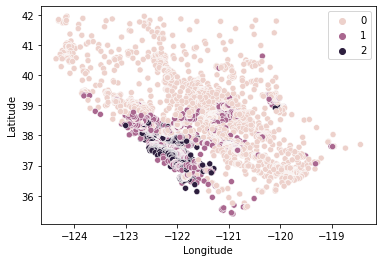

In [63]:
#Plot so_cal_df with the 3 clusters based on MedHouseVal
sns.scatterplot(x='Longitude',y='Latitude',data=so_cal_df,hue=hi_med_lo)

In [64]:
#Calculate the median MedHouseVal for each cluster
so_cal_df['hi_med_lo'] = hi_med_lo


c:\users\abiel\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
print(f"Clust 0 median house value: {so_cal_df['MedHouseVal'][so_cal_df['hi_med_lo']==0].median()}")
print(f"Clust 1 median house value: {so_cal_df['MedHouseVal'][so_cal_df['hi_med_lo']==1].median()}")
print(f"Clust 2 median house value: {so_cal_df['MedHouseVal'][so_cal_df['hi_med_lo']==2].median()}")

Clust 0 median house value: 1.076
Clust 1 median house value: 2.387
Clust 2 median house value: 4.0585


### Create Clusters from the full dataset
1. Using the original dataset (without any of our cluster columns) create a KMeans model. 
2. Plot the resulting clusters. 
3. Change the number of clusters and rerun the notebook. 
4. Note: I don't see any obvious pattern in these clusters. Do you? 

In [68]:
#Using the original dataset (without any of our cluster columns) create a KMeans model
orig_df = housing_df.drop(columns=['clust2'])
orig_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

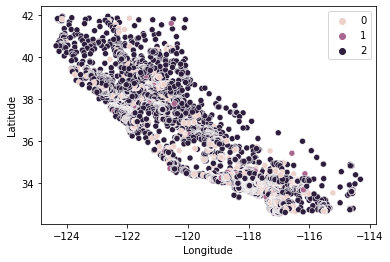

In [74]:
#Plot the resulting clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(orig_df)
kmeans.predict(orig_df)
labels = kmeans.labels_
sns.scatterplot(x='Longitude',y='Latitude',data=orig_df,hue=labels)

## Optional:
1. Explore other clustering algorithms. 
2. Cluster based on other features and plot them. 
